### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [132]:
# Load the dataset
data = pd.read_csv('data/coupons.csv')

In [133]:
# Display the first few rows of the dataset
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [134]:
# Display statistical summary of the dataset
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
# Display the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [136]:
# Display unique values in each column
pd.Series({col: data[col].unique() for col in data})

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

2. Investigate the dataset for missing or problematic data.

In [137]:
# Check for missing values
display(data.isnull().sum())
display(data.isna().mean() * 100)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [138]:
# Check for duplicate records in the dataset
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [139]:
#should drop 74 duplicates
#Drop column car as it has more missing data.(99+% of car value is missing)
data_mod = data.drop_duplicates()
data_mod = data_mod.drop(columns=['car'])
data_mod


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [140]:
# Drop records with null values as it is less than 5% of the data
data_mod = data_mod.dropna()

#Rename column Y as coupon Accepted to reflect its meaning
data_mod = data_mod.rename(columns={'Y': 'coupon_Accepted'})

data_mod

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_Accepted
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [141]:
#Taking mean shows the acceptance rate of the coupon in this case.
ratio = data_mod['coupon_Accepted'].mean() * 100
print(f'proportion of the total observations chose to accept the coupon: {ratio:.2f}%' )


proportion of the total observations chose to accept the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

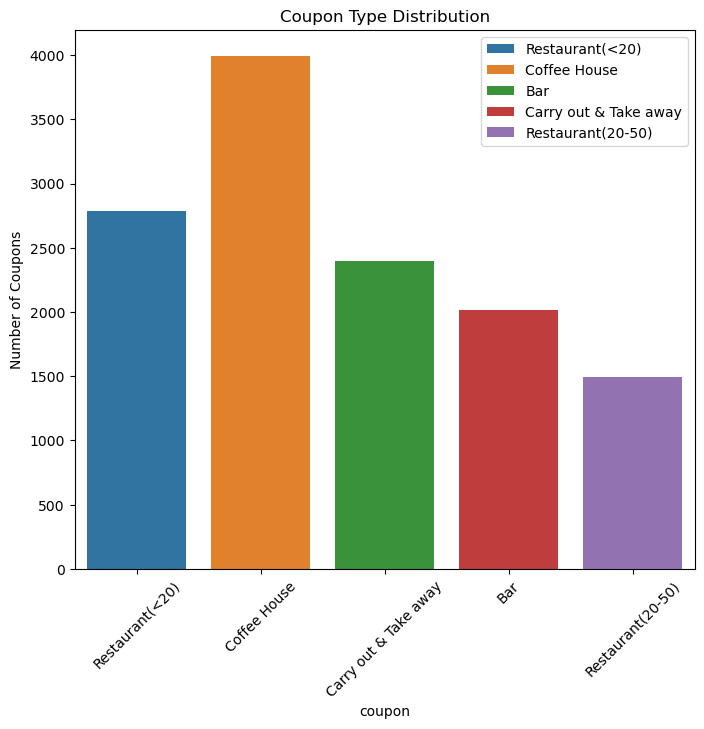

In [142]:
plt.figure(figsize=(8,7))
sns.countplot(data=data ,x='coupon',hue='coupon')
plt.legend(labels = ['Restaurant(<20)', 'Coffee House', 'Bar' ,'Carry out & Take away', 'Restaurant(20-50)'])
plt.xticks(rotation=45)
plt.title('Coupon Type Distribution')
plt.ylabel("Number of Coupons") ;

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

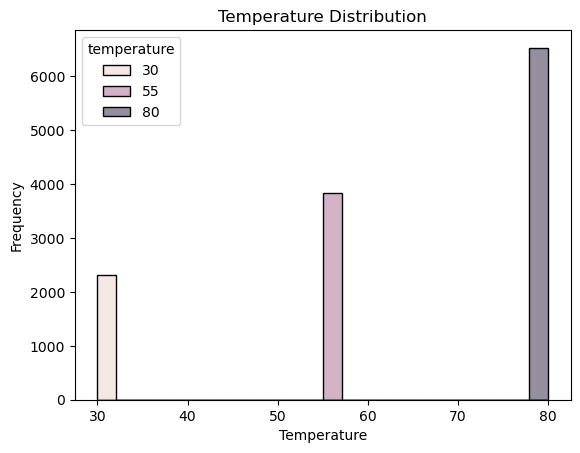

In [143]:
sns.histplot(data=data,x='temperature',hue='temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [144]:
df_bar = data_mod[data_mod['coupon'] == 'Bar']
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_Accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [145]:
bar_coupon_proportion =df_bar['coupon_Accepted'].mean() * 100
print(f'Accepted bar coupon : {bar_coupon_proportion:.2f}% ')

Accepted bar coupon : 41.19% 


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


                    sum  count  mean
bar_visit                           
3 visits or less    638   1713  0.37
More than 3 visits  147    193  0.76


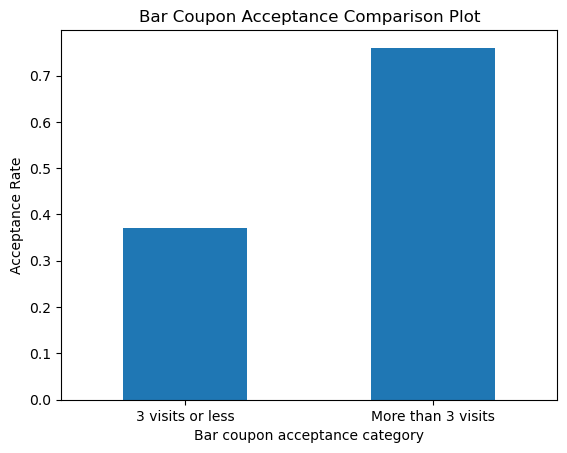

In [156]:
df_bar = df_bar.copy()
df_bar.loc[:,"bar_visit"]=np.where((df_bar['Bar'].isin(['never', 'less1', '1~3'])), '3 visits or less' ,'More than 3 visits')
print(df_bar.groupby("bar_visit")["coupon_Accepted"].agg(['sum','count','mean']).round(2))
df_bar.groupby("bar_visit")["coupon_Accepted"].mean().round(2).plot(kind='bar',xlabel='Bar coupon acceptance category', ylabel='Acceptance Rate',title='Bar Coupon Acceptance Comparison Plot');

plt.xticks(rotation=0);

The above visualization compares data between drivers who visits bars more than 3 times a month and drivers who visit bars less than 3 times. Below is the understanding based on the plot.

1) As per the comparison plot, people who tend to visit bar 3 or more times has accepted coupons more than people who went to bar less or equal to 3 times.
2) This suggests a positive correlation between frequent bar visits and willingness to accept coupons, possibly due to greater social activity or openness to promotional offers among more frequent bar-goers to save more money.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


            sum  count  mean
driv_per                    
Grtr1Visit  278    403  0.69
Less1Visit  507   1503  0.34


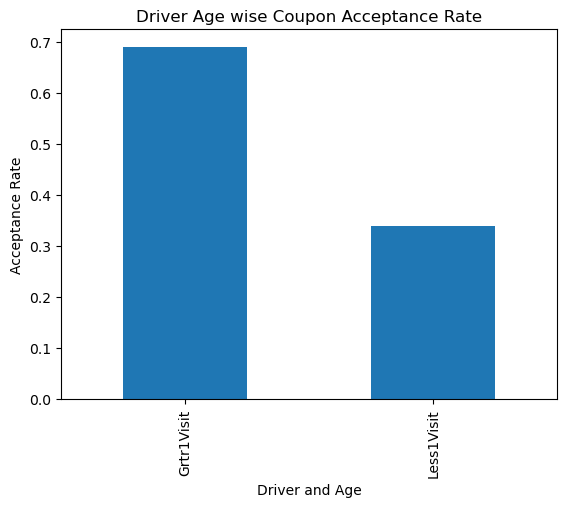

In [157]:
# Calculate the mean for customers who went to the bar more than 1 time and are above 25 years old.

df_bar.loc[:,'driv_per']=np.where((df_bar['Bar'].isin(['1~3','4~8','gt8']) & (~df_bar['age'].isin(['below21','21']))), 'Grtr1Visit','Less1Visit')

print(df_bar.groupby("driv_per")["coupon_Accepted"].agg(['sum','count','mean']).round(2))
df_bar.groupby("driv_per")["coupon_Accepted"].mean().round(2).plot(kind='bar',xlabel= 'Driver and Age', ylabel='Acceptance Rate',title='Driver Age wise Coupon Acceptance Rate');

The above visualization compares data between drivers who are above 25 that go to bars more than once a month and all others. Below is the understanding based on the plot above. 
1) As per the above bar plot the acceptance rate is greater in people over 25 years old.
2) X-axis groups the data based on the number of visits and age, Y axis shows the acceptance rate between these groups. 
3) This suggests that age and social habits, like going to bars, may be associated with a greater likelihood of accepting coupons. It could indicate that older, more socially active individuals are more receptive to promotional offers.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


                                           sum  count  mean
occupation                                                 
Education&Training&Library                   8     20  0.40
Building & Grounds Cleaning & Maintenance    1      2  0.50
Retired                                      2      4  0.50
Transportation & Material Moving             7     13  0.54
Installation Maintenance & Repair            5      9  0.56
Computer & Mathematical                     27     47  0.57
Legal                                       10     17  0.59
Business & Financial                        15     25  0.60
Life Physical Social Science                 2      3  0.67
Student                                     43     64  0.67
Sales & Related                             42     61  0.69
Personal Care & Service                      6      8  0.75
Office & Administrative Support             30     39  0.77
Arts Design Entertainment Sports & Media    17     22  0.77
Healthcare Practitioners & Technical    

<Axes: xlabel='occupation'>

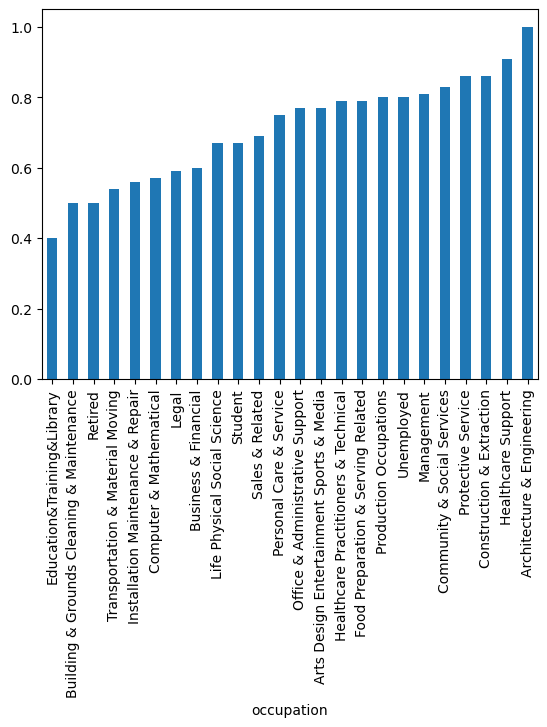

In [ ]:
acpt_rt_occup = df_bar.query("passanger != 'Kid(s)' and Bar not in ('never', 'less1') and occupation != ('Farming Fishing & Forestry')").groupby("occupation")["coupon_Accepted"].agg(['sum','count','mean']).round(2).sort_values(by='mean')
print(acpt_rt_occup)
acpt_rt_occup['mean'].plot(kind="bar")

The above visualization compares data between drivers in different occupations who didn't have kids as passangers, that go to bars more than once a month and occupation not in farming, fishing, or forestry. Below is the understanding based on the plot above. 
1) Bar chart shows acceptance rate for coupons in different occupations represented in x axis. 
2) Highest acceptance is in people who work in sectors Comminity & social services,protective Services,construction and Extraction, Healthcare Support and Architechture & Engineering.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



   Bar  passanger  count  sum  mean
0  1~3      Alone    215  140  0.65
1  1~3  Friend(s)     75   62  0.83
2  1~3    Partner     55   32  0.58
3  4~8      Alone    100   82  0.82
4  4~8  Friend(s)     25   18  0.72
5  4~8    Partner     15   10  0.67
6  gt8      Alone     26   19  0.73
7  gt8  Friend(s)     16   11  0.69
8  gt8    Partner      3    2  0.67


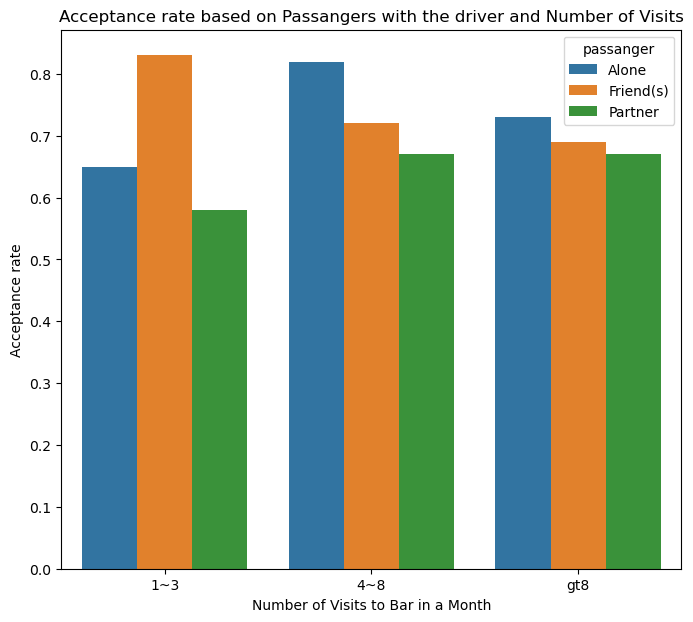

In [149]:
plt.figure(figsize=(8,7))
coupon_group=df_bar.query("Bar not in ('never','less1') and passanger!='Kid(s)' and maritalStatus != 'widowed'").groupby(['Bar','passanger'],as_index=False)['coupon_Accepted'].agg(['count','sum','mean']).sort_values(by='Bar').round(2)
print(coupon_group)
sns.barplot(coupon_group,x='Bar',y='mean',hue='passanger')
plt.title("Acceptance rate based on Passangers with the driver and Number of Visits")
plt.xlabel("Number of Visits to Bar in a Month")
plt.ylabel("Acceptance rate");

The above visualization compares data between drivers who didn't have kids as passangers, that go to bars more than once a month and their marital status is not widowed. Below is the understanding based on the plot. 
X-axis represents multiple groups based on the number of times people visit the Bar in a month. 
1) When drivers who go to Bar less than 3 times a month tend to accept coupons more when they are with Friends or when alone that when they are with a partner. 
2) General observation is that the drivers who frequent bar more tend to accept coupons more. 
3) When bar visits are more than 3 times people accept coupons when they are alone or with friends.

  RestaurantLessThan20            income  count  sum  mean
0                  4~8   $12500 - $24999    424  229  0.54
1                  4~8   $25000 - $37499    414  237  0.57
2                  4~8   $37500 - $49999    348  213  0.61
3                  4~8  Less than $12500    349  204  0.58
4                  gt8   $12500 - $24999    164   99  0.60
5                  gt8   $25000 - $37499    132   87  0.66
6                  gt8   $37500 - $49999    264  175  0.66
7                  gt8  Less than $12500    109   83  0.76


Text(0.5, 1.0, 'Customers visiting Value Resturants')

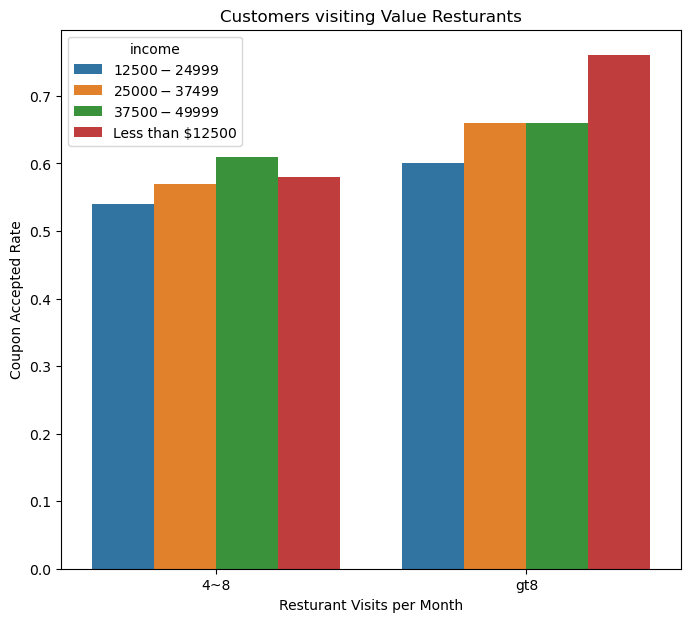

In [150]:
 #go to cheap restaurants more than 4 times a month and income is less than 50K. - on the original dataframe data
plt.figure(figsize=(8,7))
less_than_50000= [ '$12500 - $24999','$37500 - $49999', '$25000 - $37499', 'Less than $12500']
income_group=data_mod.query("RestaurantLessThan20 in ('4~8','gt8') and income in @less_than_50000").groupby(['RestaurantLessThan20','income'],as_index=False)['coupon_Accepted'].agg(['count','sum','mean']).sort_values(by='RestaurantLessThan20').round(2)
print(income_group)
sns.barplot(income_group,x='RestaurantLessThan20',y='mean',hue='income')

plt.xlabel('Resturant Visits per Month')
plt.ylabel('Coupon Accepted Rate')
plt.title('Customers visiting Value Resturants')

The above visualization compares data between drivers who visit bars more than 4 times a month and income less than 50k. Below is the understanding based on the plot . \
X-axis represents multiple groups based on the number of times people visit the Bar in a month. 
1) coupon acceptance is higher in when income is less in both groups of people who visit bars 4 to 8 times or more than 8 times a month.
2) coupon acceptance is also high in income group 37500-49999 in both categories.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Below is the hypothesis about drivers who accepted Bar coupons based on the above charts
1) Coupon acceptance is high among drivers who traveled with friends.
2) Coupon acceptance has a positive regression with the number of visits.
3) Age also plays an important role in the acceptance of the coupons. higher the age people utilized coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [151]:
coffee_house_df=data_mod.query('coupon == "Coffee House"')
coffee_house_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_Accepted
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


1. Do Weather influence on coupon ?

weather
Snowy    0.43
Sunny    0.50
Rainy    0.52
Name: coupon_Accepted, dtype: float64


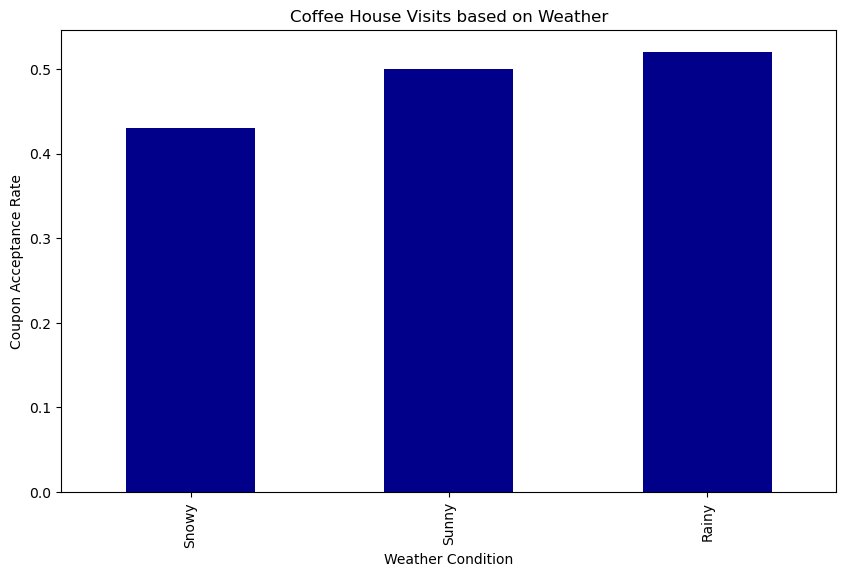

In [152]:
coffee_house_cpn =coffee_house_df.groupby("weather")["coupon_Accepted"].mean().round(2).sort_values()
print(coffee_house_cpn)
plt.figure(figsize=(10, 6))
coffee_house_cpn.plot(kind="bar",color='darkblue')
plt.title("Coffee House Visits based on Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Coupon Acceptance Rate");

Based on above plot we can hypothize that coupon acceptance is higher on Rainy days ,which confirms our understanding that on rainy days people prefer going to warm and cozy places like Coffee Houses.

2. Compare Coffee House coupon acceptance rate between people travelling alone and all other categories?

                  sum  count  mean
with_passenger                    
Visited Alone     934   2154  0.43
With a Passenger  954   1655  0.58


<Axes: title={'center': 'Driver Companion-Based Coupon Acceptance Rate'}, xlabel='Travelling with Companion', ylabel='Acceptance Rate'>

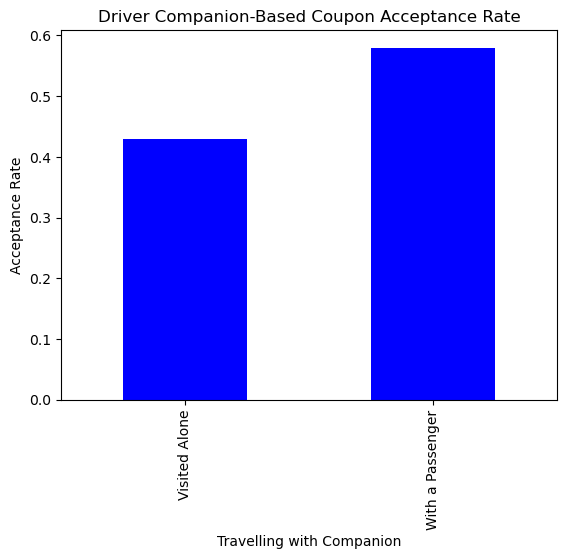

In [155]:
coffee_house_df = coffee_house_df.copy()
coffee_house_df.loc[:, 'with_passenger'] = np.where(
    coffee_house_df['passanger'] == 'Alone',
    'Visited Alone',
    'With a Passenger'
)
# Group and visualize
summary = (
    coffee_house_df
    .groupby('with_passenger')['coupon_Accepted']
    .agg(['sum', 'count', 'mean'])
    .round(2)
)
print(summary)

summary['mean'].plot(
    kind='bar',
    color='blue',
    xlabel='Travelling with Companion',
    ylabel='Acceptance Rate',
    title='Driver Companion-Based Coupon Acceptance Rate'
)

Based on the above plot we can say that when the drivers are with a companion they tend to accept more coupons.